# 一、数据读取

In [1]:
import pandas as pd
import pathlib
# dir = pathlib.Path('data')
mypath = "./data"
data=[]
folder = pathlib.Path.cwd().joinpath(mypath, 'train')#文件夹路径
for fp in folder.iterdir():
    df=pd.read_csv(fp)
    data.append((df,fp))
len(data)

916

In [2]:
# 观察数据特征
data[0][0].head()

,部件工作时长,累积量参数1,累积量参数2,转速信号1,转速信号2,压力信号1,压力信号2,温度信号,流量信号,电流信号,开关1信号,开关2信号,告警信号1,设备类型
0,0.0,0.0,0.0,8656.07,19576.59,67.78,376.72,42.3,137.43,620.04,0.0,0.0,0.0,S26a
1,0.0,0.0,0.0,8660.84,19574.57,65.67,375.06,42.3,138.46,620.01,0.0,0.0,0.0,S26a
2,0.0,0.0,0.0,8661.80,19575.43,67.05,376.61,42.3,137.08,620.11,0.0,0.0,0.0,S26a
3,0.0,0.0,0.0,12306.54,28022.09,84.84,332.24,42.3,137.34,620.22,0.0,0.0,0.0,S26a
4,0.0,0.0,0.0,12305.17,28024.40,82.79,332.28,42.3,132.54,620.12,0.0,0.0,0.0,S26a


In [3]:
# 查看各列属性的数据量和缺失情况
data[0][0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35661 entries, 0 to 35660
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   部件工作时长  35661 non-null  float64
 1   累积量参数1  35661 non-null  float64
 2   累积量参数2  35661 non-null  float64
 3   转速信号1   35661 non-null  float64
 4   转速信号2   35661 non-null  float64
 5   压力信号1   35661 non-null  float64
 6   压力信号2   35661 non-null  float64
 7   温度信号    35661 non-null  float64
 8   流量信号    35661 non-null  float64
 9   电流信号    35661 non-null  float64
 10  开关1信号   35661 non-null  float64
 11  开关2信号   35661 non-null  float64
 12  告警信号1   35661 non-null  float64
 13  设备类型    35661 non-null  object 
dtypes: float64(13), object(1)
memory usage: 3.8+ MB


训练数据集的基本情况：
有13列属性：分别为部件工作时长，累积量参数1，累积量参数2，转速信号1，转速信号2，压力信号1，压力信号2，温度信号，流量信号，电流信号，开关1信号，开关2信号，告警信号1，设备类型
数据集的各项属性均不存在缺失值

In [5]:
# 查看各列属性的基本统计信息
data[0][0].describe()

,部件工作时长,累积量参数1,累积量参数2,转速信号1,转速信号2,压力信号1,压力信号2,温度信号,流量信号,电流信号,开关1信号,开关2信号,告警信号1
count,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.0,55859.000000
mean,4066.770592,76622.149242,81165.021975,7828.778586,17146.625721,118.529115,341.903339,60.995861,83.571954,829.339170,0.315527,0.0,0.029843
std,2227.611652,43287.889501,45491.092616,2924.623679,7760.556261,103.325901,61.408848,11.628993,43.019423,411.934032,0.464729,0.0,0.170156
min,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,5.600000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2181.250000,39674.250000,42402.750000,5202.400000,11845.520000,67.410000,334.920000,55.600000,49.030000,620.100000,0.000000,0.0,0.000000
50%,4185.500000,77357.500000,82797.000000,5322.170000,12005.350000,68.970000,354.340000,62.100000,73.550000,620.210000,0.000000,0.0,0.000000
75%,5880.250000,112950.750000,119518.750000,10728.185000,24432.870000,173.175000,371.640000,67.900000,132.350000,1178.270000,1.000000,0.0,0.000000
max,7942.500000,152438.000000,159607.500000,12985.950000,28973.530000,950.440000,472.030000,115.600000,138.500000,1627.800000,1.000000,0.0,1.000000


# 二、数据预处理

## 2.1 缺失值处理

In [6]:
flag = 0
for data_i, fp in data:
    missing_value_count =  data_i.isnull().sum()
    if missing_value_count.sum() > 0:
        print(f'{fp} missing value count: {missing_value_count}')
        flag = 1
    else:
        print(f'{fp} missing value count: 0')
if flag == 0:
    print('All files have no missing value')


D:\Data_Ana\HM\data\train\00fb58ecd675062e4423.csv missing value count: 0
D:\Data_Ana\HM\data\train\023f3b34ae4ae455a3a3.csv missing value count: 0
D:\Data_Ana\HM\data\train\02d951c4e7aa0555a8a7.csv missing value count: 0
D:\Data_Ana\HM\data\train\034308a074619b08c67f.csv missing value count: 0
D:\Data_Ana\HM\data\train\03a1ba177aa1c0aaba25.csv missing value count: 0
D:\Data_Ana\HM\data\train\0414b70a2c875ff40706.csv missing value count: 0
D:\Data_Ana\HM\data\train\0469eae8341183fe1c31.csv missing value count: 0
D:\Data_Ana\HM\data\train\04981953f6db6803fb94.csv missing value count: 0
D:\Data_Ana\HM\data\train\04f4ee49de378a04bd51.csv missing value count: 0
D:\Data_Ana\HM\data\train\050ddc66f0ba174dc837.csv missing value count: 0
D:\Data_Ana\HM\data\train\051386ff6c7ba31070a5.csv missing value count: 0
D:\Data_Ana\HM\data\train\0538197e025d2e1c6e54.csv missing value count: 0
D:\Data_Ana\HM\data\train\053e4f345a91ccb20189.csv missing value count: 0
D:\Data_Ana\HM\data\train\05459e25fd45

D:\Data_Ana\HM\data\train\3e5693071f62bbf4d491.csv missing value count: 0
D:\Data_Ana\HM\data\train\3eb904d37a1261199c74.csv missing value count: 0
D:\Data_Ana\HM\data\train\3ec187ac9790fc84ccc9.csv missing value count: 0
D:\Data_Ana\HM\data\train\3f116318e1d27aece037.csv missing value count: 0
D:\Data_Ana\HM\data\train\3f36ec976c8e6ebd9299.csv missing value count: 0
D:\Data_Ana\HM\data\train\3f6662d8a8446a1ed339.csv missing value count: 0
D:\Data_Ana\HM\data\train\3fa0f14cd46d2bbd92ac.csv missing value count: 0
D:\Data_Ana\HM\data\train\3fbf6d0b4266d7dccf7b.csv missing value count: 0
D:\Data_Ana\HM\data\train\403ab3b17849ac053507.csv missing value count: 0
D:\Data_Ana\HM\data\train\405837385d6ca046f0a4.csv missing value count: 0
D:\Data_Ana\HM\data\train\4061174a848cce01b182.csv missing value count: 0
D:\Data_Ana\HM\data\train\40cfcf5f7be58573bb35.csv missing value count: 0
D:\Data_Ana\HM\data\train\41c6010f59b1c1ec1174.csv missing value count: 0
D:\Data_Ana\HM\data\train\41dfba33cd18

D:\Data_Ana\HM\data\train\5e4deecc5084be8d73a1.csv missing value count: 0
D:\Data_Ana\HM\data\train\5e595f98decdcfe8f2b2.csv missing value count: 0
D:\Data_Ana\HM\data\train\5ec08d6679210fa1f840.csv missing value count: 0
D:\Data_Ana\HM\data\train\5fa4378fece8e41828ec.csv missing value count: 0
D:\Data_Ana\HM\data\train\5fa4ac154d0e94bfa740.csv missing value count: 0
D:\Data_Ana\HM\data\train\5fe068ea23a39ce0b722.csv missing value count: 0
D:\Data_Ana\HM\data\train\5ff0017257347257eeca.csv missing value count: 0
D:\Data_Ana\HM\data\train\60e016d0b3fe8976e712.csv missing value count: 0
D:\Data_Ana\HM\data\train\61011e26ebc4a4d6c716.csv missing value count: 0
D:\Data_Ana\HM\data\train\6159e4bbf06dbdcae11c.csv missing value count: 0
D:\Data_Ana\HM\data\train\61ae0cd724ec857121e5.csv missing value count: 0
D:\Data_Ana\HM\data\train\620b71882ffe5d7a3142.csv missing value count: 0
D:\Data_Ana\HM\data\train\6215016166557c61ac73.csv missing value count: 0
D:\Data_Ana\HM\data\train\6247274ecddb

D:\Data_Ana\HM\data\train\7bfb3bc94f667f6949a7.csv missing value count: 0
D:\Data_Ana\HM\data\train\7c5048d6ab62921324d6.csv missing value count: 0
D:\Data_Ana\HM\data\train\7c897de1a4ba938a5408.csv missing value count: 0
D:\Data_Ana\HM\data\train\7cb453eb730b30556a96.csv missing value count: 0
D:\Data_Ana\HM\data\train\7d353d490b4a80f43175.csv missing value count: 0
D:\Data_Ana\HM\data\train\7d5c4c5679546904173b.csv missing value count: 0
D:\Data_Ana\HM\data\train\7d69e963490a7fd52f96.csv missing value count: 0
D:\Data_Ana\HM\data\train\7e12e9e62790baa04d81.csv missing value count: 0
D:\Data_Ana\HM\data\train\7e31fc108e356482bd16.csv missing value count: 0
D:\Data_Ana\HM\data\train\7e66a3f09c750b0fa623.csv missing value count: 0
D:\Data_Ana\HM\data\train\7f57ea000d3ad0d4727e.csv missing value count: 0
D:\Data_Ana\HM\data\train\7f614436e215b1cc3a59.csv missing value count: 0
D:\Data_Ana\HM\data\train\7fcbbd8a626d002fe001.csv missing value count: 0
D:\Data_Ana\HM\data\train\8018ace6ed55

D:\Data_Ana\HM\data\train\9cb28fea2aeba7976832.csv missing value count: 0
D:\Data_Ana\HM\data\train\9cb65f289b43a21c6516.csv missing value count: 0
D:\Data_Ana\HM\data\train\9d1b8735b6864920d564.csv missing value count: 0
D:\Data_Ana\HM\data\train\9d6bb7d549c1069e48cc.csv missing value count: 0
D:\Data_Ana\HM\data\train\9de18ea906c40cf6fd15.csv missing value count: 0
D:\Data_Ana\HM\data\train\9df05109a65da8a8d62e.csv missing value count: 0
D:\Data_Ana\HM\data\train\9ea28e11b1e5db2fad60.csv missing value count: 0
D:\Data_Ana\HM\data\train\9ee4cbd3c86dced95d6d.csv missing value count: 0
D:\Data_Ana\HM\data\train\9eeab9796b9e52a0d408.csv missing value count: 0
D:\Data_Ana\HM\data\train\9f8e5c24325cf761f58e.csv missing value count: 0
D:\Data_Ana\HM\data\train\9fa8e06b7af99c4575d8.csv missing value count: 0
D:\Data_Ana\HM\data\train\9fcea80c4ce99a00ccf5.csv missing value count: 0
D:\Data_Ana\HM\data\train\9fd98bbe3b382afd3f5a.csv missing value count: 0
D:\Data_Ana\HM\data\train\a02149aed967

D:\Data_Ana\HM\data\train\d38cd985e842403992f2.csv missing value count: 0
D:\Data_Ana\HM\data\train\d3a52633b6f6d76a41d8.csv missing value count: 0
D:\Data_Ana\HM\data\train\d4b098e9d3c1097bce4f.csv missing value count: 0
D:\Data_Ana\HM\data\train\d4ecf73581491ec90325.csv missing value count: 0
D:\Data_Ana\HM\data\train\d4ef73d9d83d3dbcfecf.csv missing value count: 0
D:\Data_Ana\HM\data\train\d52da6504fd5a689c23c.csv missing value count: 0
D:\Data_Ana\HM\data\train\d55dbf7027399d95a0bf.csv missing value count: 0
D:\Data_Ana\HM\data\train\d5d2853f6780d1e020b3.csv missing value count: 0
D:\Data_Ana\HM\data\train\d656f40c128ed64922bd.csv missing value count: 0
D:\Data_Ana\HM\data\train\d67371698a3aea11f382.csv missing value count: 0
D:\Data_Ana\HM\data\train\d6803b9c0a429d4ae751.csv missing value count: 0
D:\Data_Ana\HM\data\train\d680a484e4512fbc116e.csv missing value count: 0
D:\Data_Ana\HM\data\train\d6d5ed2275373deabf7f.csv missing value count: 0
D:\Data_Ana\HM\data\train\d6edc58490f5

D:\Data_Ana\HM\data\train\f5ef60f0720e2802bbc1.csv missing value count: 0
D:\Data_Ana\HM\data\train\f64143df3dd979288083.csv missing value count: 0
D:\Data_Ana\HM\data\train\f69b4fd8ab5b606f7fa9.csv missing value count: 0
D:\Data_Ana\HM\data\train\f6ccba8359468a18c85b.csv missing value count: 0
D:\Data_Ana\HM\data\train\f6e47145270057957b63.csv missing value count: 0
D:\Data_Ana\HM\data\train\f742c76952e728ebcf78.csv missing value count: 0
D:\Data_Ana\HM\data\train\f760be00bdef803304c6.csv missing value count: 0
D:\Data_Ana\HM\data\train\f7abb42fbdc93ab67305.csv missing value count: 0
D:\Data_Ana\HM\data\train\f7ba04728a91fa65f25d.csv missing value count: 0
D:\Data_Ana\HM\data\train\f85aff1bdbcdd441dc89.csv missing value count: 0
D:\Data_Ana\HM\data\train\f971d176a647e38f1493.csv missing value count: 0
D:\Data_Ana\HM\data\train\f99652a1c096d3a8cdf6.csv missing value count: 0
D:\Data_Ana\HM\data\train\fa00dbcf6ce0f3e151e3.csv missing value count: 0
D:\Data_Ana\HM\data\train\fa28cb5d51ab

## 2.2 异常值处理

[94.6 94.4 67.9 95.  95.6 96.6 96.1 97.4 77.8 77.3 -0.7 71.8 17.6 18.1
 88.6 19.1 19.6 20.6 20.1 21.6]
[26.7 27.2 27.7 28.7 28.2 29.2 29.7 30.7 31.7 31.2 -3.1  1.1  2.1  3.1
 74.1 77.1 78.6 79.1 32.3 32.8]
[91.2 91.8 92.8 93.3 94.3 94.7 96.7 97.8 97.7  0.7 -0.8 16.9 16.4 17.4
 19.9 22.9 23.9 23.4 24.9 24.4]
[59.4 60.9 60.4 61.9 61.4 62.9 62.4 63.9 63.4 81.5 -6.4 -4.3]
[60.9 60.4 61.9 61.4 62.9 62.4 63.9 63.4 81.5 -6.4 -4.3]


/Users/mlz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mlz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mlz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mlz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mlz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing f

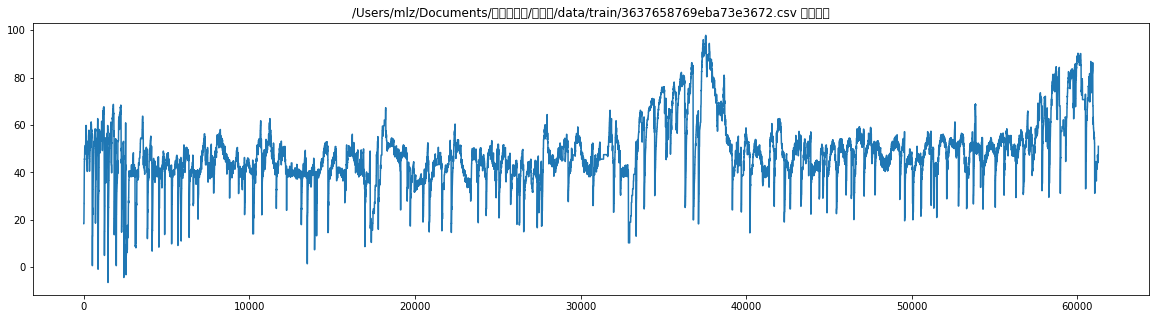

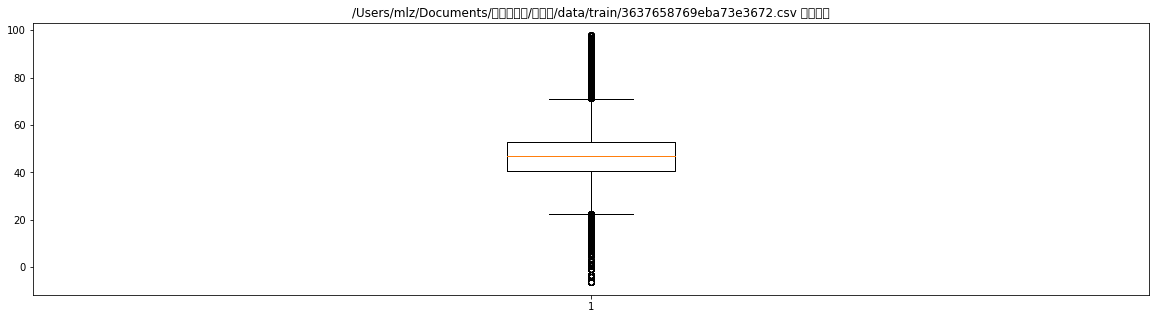

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from torch import negative
# 首先我们需要检查数据的异常值，这里我们使用箱线图来检查异常值
# 查看温度信号的分布情况
for data_i, fp in data:
    if data_i['温度信号'].min() < 0:
        # 第一次出现负值时的索引
        temperature = data_i['温度信号']
        temperature = np.array(list(set(temperature)))
        for index, negative_index in enumerate(np.where(temperature < 0)[0]):
            print(temperature[negative_index-10:negative_index+10])
            if index > 5:
                break
        # 可视化温度信号的序列分布
        plt.figure(figsize=(20, 5))
        plt.plot(data_i['温度信号'])
        plt.title(f'{fp} 温度信号')
        # 可视化温度信号的箱线图
        plt.figure(figsize=(20, 5))
        plt.boxplot(data_i['温度信号'])
        plt.title(f'{fp} 温度信号')
        plt.show()
        break

/Users/mlz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mlz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mlz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mlz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mlz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing f

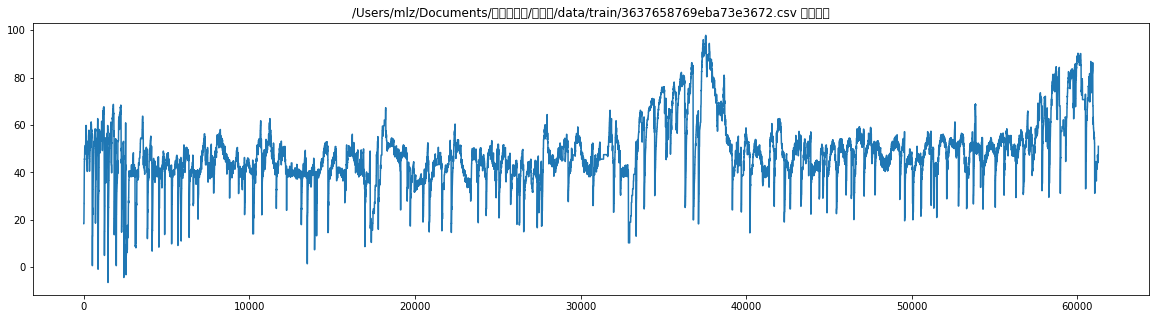

SystemExit: 

/Users/mlz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
# 针对温度负值，取绝对值
# 查看部件工作时长随时间的变化情况
plt.plot(data[0][0]['部件工作时长'])
plt.grid(True)
# 可以看到序列存在突变的负值
import numpy as np
workingtime_of_components = data[0][0]['部件工作时长'].values
workingtime_of_components = list(set((workingtime_of_components)))
workingtime_of_components = np.array(workingtime_of_components)
print(workingtime_of_components)
# 输出第一次出现负值的索引
index = np.where(workingtime_of_components < 0)[0][0]
workingtime_of_components[index-10:index+10]

产生了负值序列。猜测工业传感器可能的情况：
1. 传感器由于工作环境以及数据存储问题可能会出现数据初始值重置的情况
2. 无论初始值为多少，传感器始终为递增计数

处理这种情况分为三步：
1. 找到一整块负值序列
2. 以该序列前一个正值作为初始值重置，按负值内部递增规律重新计算真实工作时长
3. 后续正值加上负值内部极差

In [5]:
import warnings
import os
warnings.filterwarnings("ignore")

#负值处理
def nega_outlier_process(data,col):
    #数据最大索引
    index_max=data.shape[0]-1
    #负值索引
    negaindex=pd.DataFrame()
    negaindex['index']=data[data[col]<0].index.tolist()
    
    #查找多段负值分割点，用lix保存（‘负值索引’突变的索引）
    negaindex['ptp']=negaindex['index'].rolling(2, min_periods=1).apply(np.ptp)
    lixmax=len(negaindex)-1
    lix=[0]+negaindex[negaindex['ptp']>1].index.tolist()+[lixmax]
    #print(negaindex,lix)
    #循环读取每一个负值分段
    for i in range(len(lix)-1):
        #最后一个分段处理，negai代表分段负值索引dataframe
        if lix[i+1]==lixmax:
            negai=negaindex['index'].iloc[lix[i]:]
        #前面分段处理
        else:
            negai=negaindex['index'].iloc[lix[i]:lix[i+1]]
        #分段内负值的极差
        nega_ptp=round(data[col][negai.tolist()].max()-data[col][negai.tolist()].min(),2)
        if negai.max()<index_max:
            #分段两端正值的差（前提是有后分段）
            posi_ptp=round(data[col][negai.min()-1]-data[col][negai.max()+1],2)
            #负值内部加absnega_max,同时加上正值前端
            data[col][negai.tolist()]=data[col][negai.tolist()]+\
                                      abs(data[col][negai.tolist()]).max()+\
                                      data[col][negai.min()-1]
            #正值后端阶段加上nega_ptp,（st：posi_ptp大于0）再加posi_ptp
            if posi_ptp>0:
                if lix[i+1]==lixmax:
                    data[col][negai.max()+1:]=data[col][negai.max()+1:]+nega_ptp+posi_ptp
                else:
                    data[col][negai.max()+1:negaindex['index'][lix[i+1]]]=data[col][negai.max()+1:negaindex['index'][lix[i+1]]]+nega_ptp+posi_ptp
            else:
                if lix[i+1]==lixmax:
                    data[col][negai.max()+1:]=data[col][negai.max()+1:]+nega_ptp
                else:
                    data[col][negai.max()+1:negaindex['index'][lix[i+1]]]=data[col][negai.max()+1:negaindex['index'][lix[i+1]]]+nega_ptp
        else:
            #如果没有后分段，负值内部加上nega_ptp,同时加上正值前端
            data[col][negai.tolist()]=data[col][negai.tolist()]+\
                                      abs(data[col][negai.tolist()]).max()+\
                                      data[col][negai.min()-1]
    return data


#异常数据处理
def outer_data(data,e):
    #负值处理
    for col in [ '累积量参数1', '累积量参数2','部件工作时长']:
        if data[col].min()<0:
            data=nega_outlier_process(data,col)
    data['温度信号']=abs(data['温度信号']) # 
    if os.path.basename(e)=='de5d7628aced6b08c5bc.csv':
        data['部件工作时长'][data['部件工作时长']>3000]=1611.5
    if os.path.basename(e)=='21bade855e1f81d7e1c8.csv':
        data['部件工作时长'][data['部件工作时长']==-4103.75]=-3.75
    return data

processed_data=[]
for (df, e) in data:
    df = outer_data(df, e)
    processed_data.append((df, e))
assert len(processed_data) == len(data)
data = processed_data
data_length = len(data)

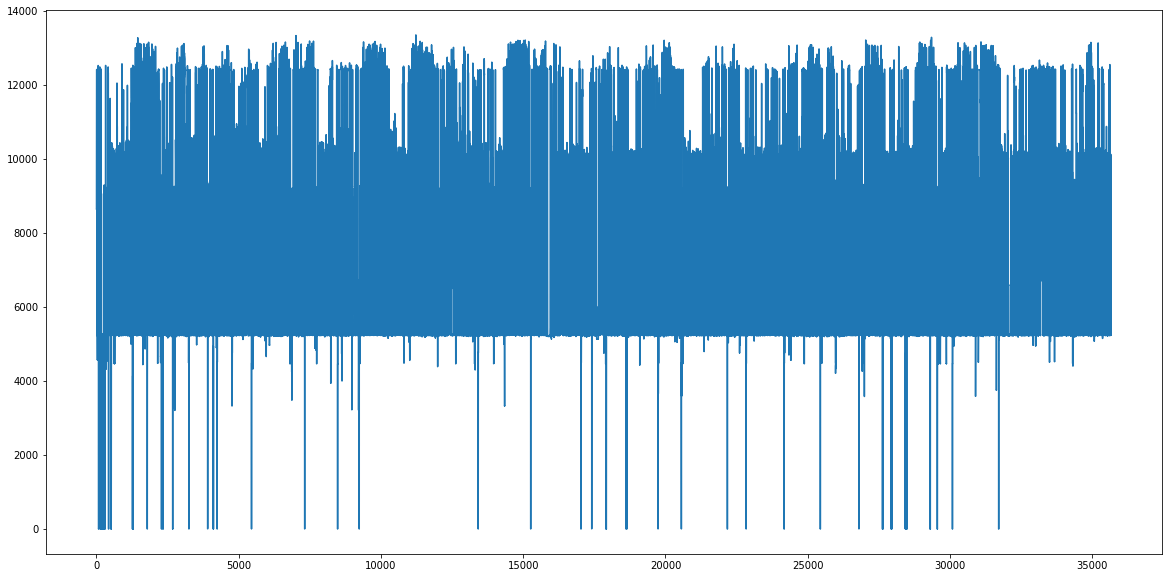

In [7]:
# 可视化转速的时序分布图
plt.figure(figsize=(20, 10))
for (df, e) in data:
    plt.plot(df['转速信号1'], label=e)
    plt.show()
    break

<Figure size 1440x720 with 0 Axes>

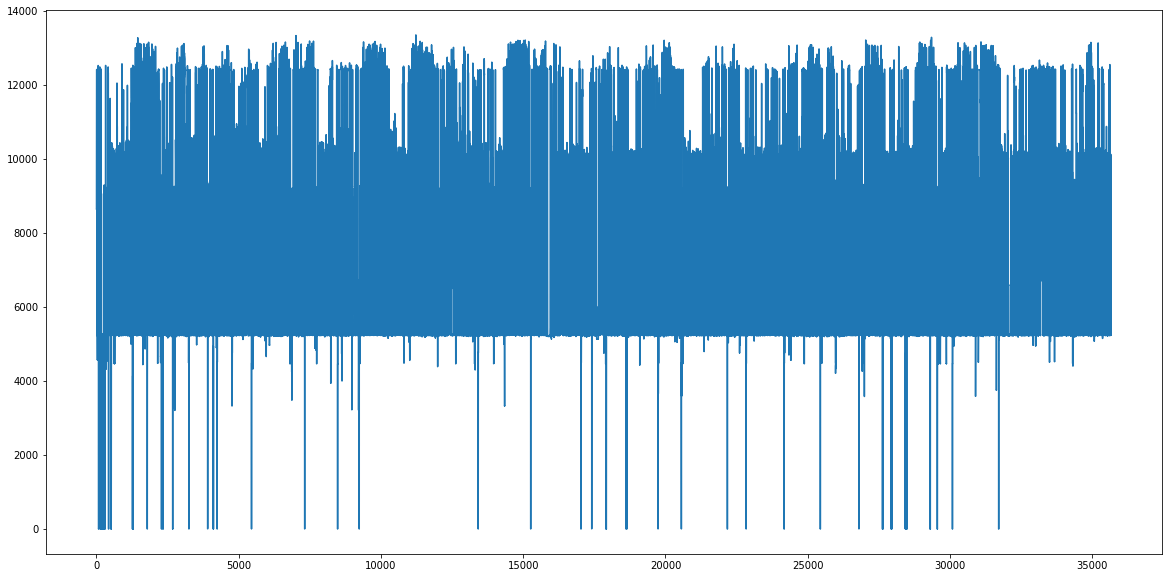

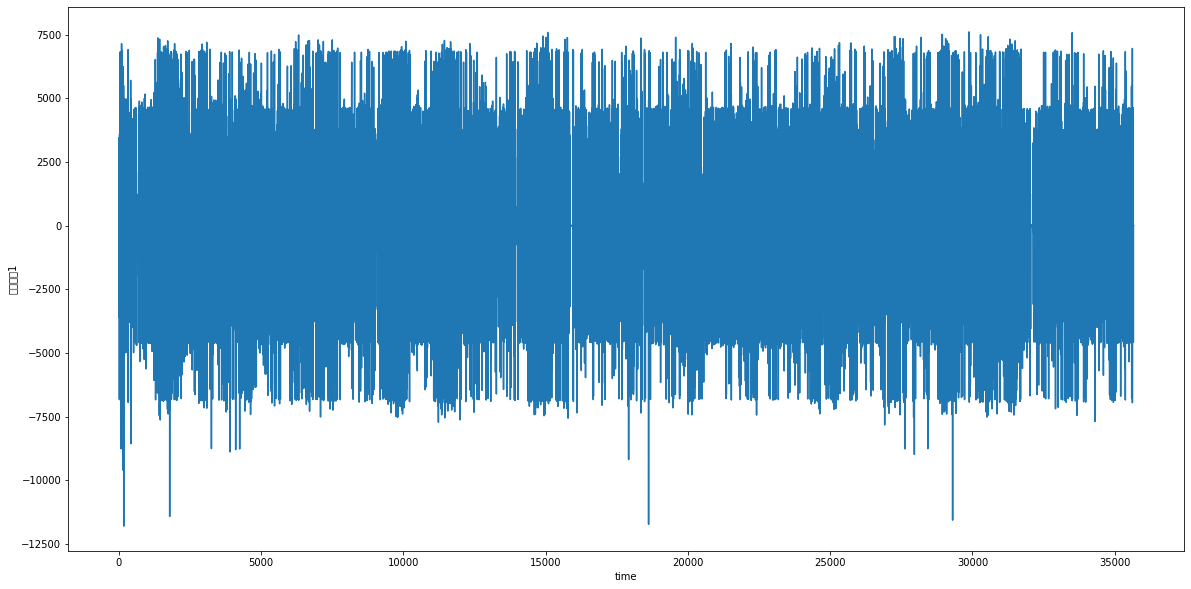

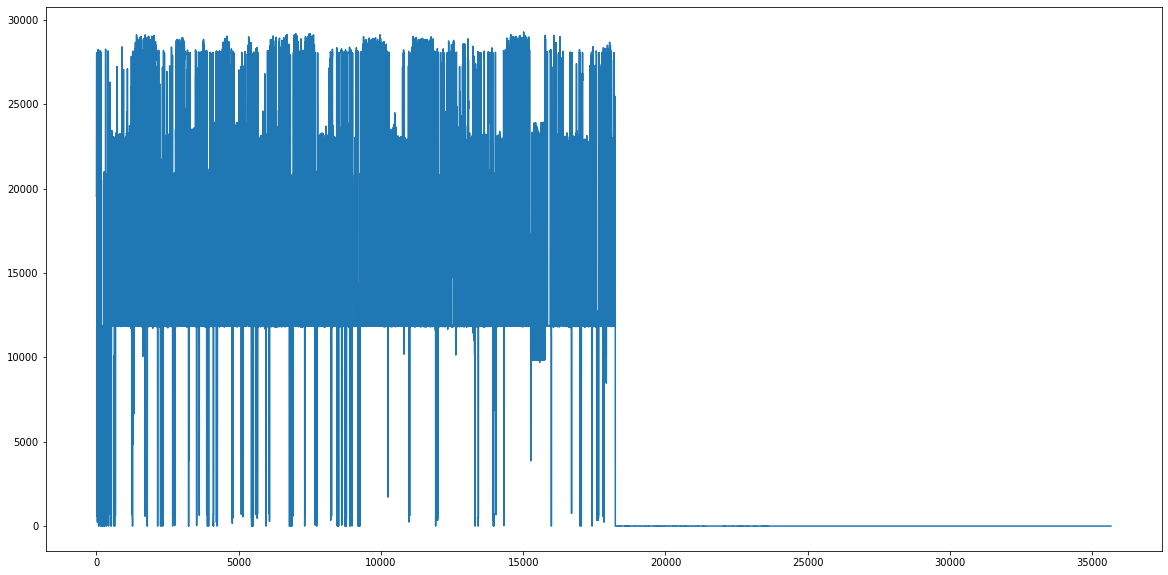

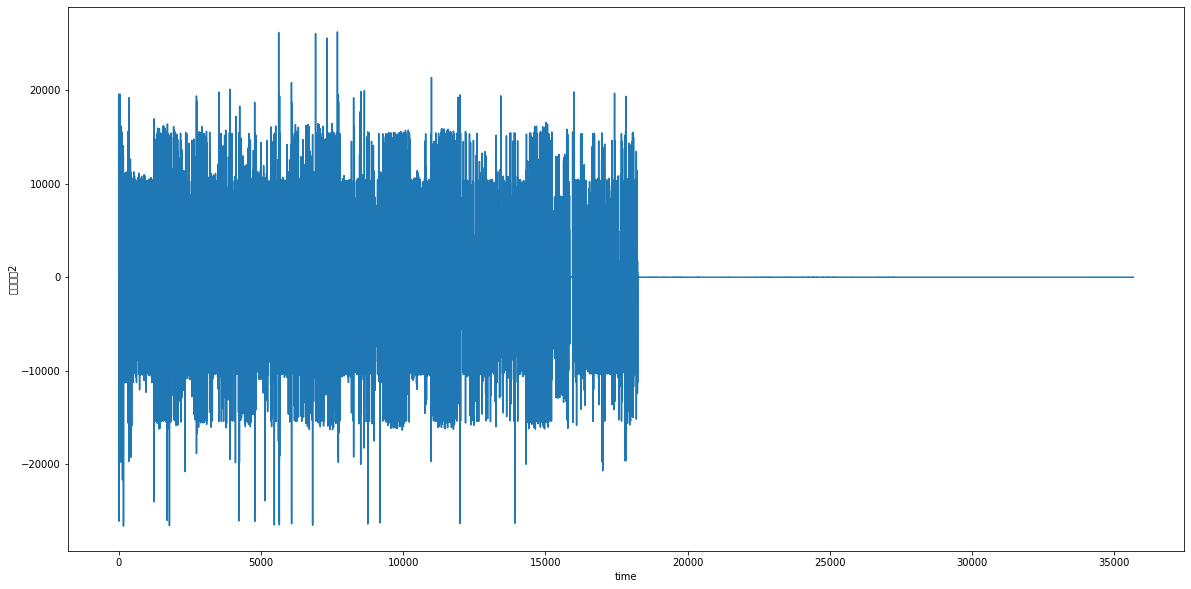

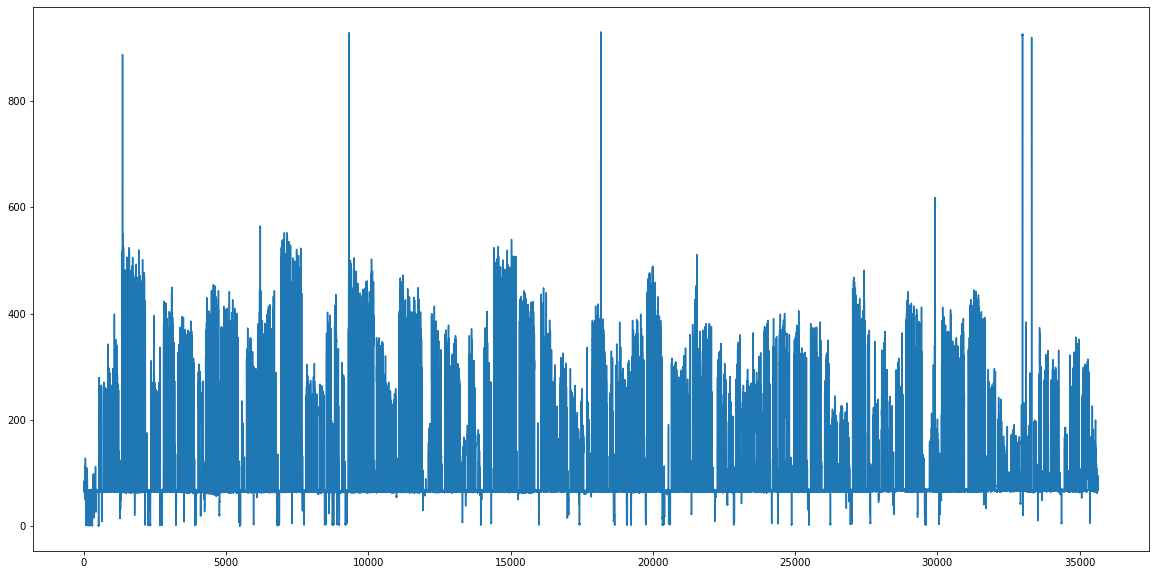

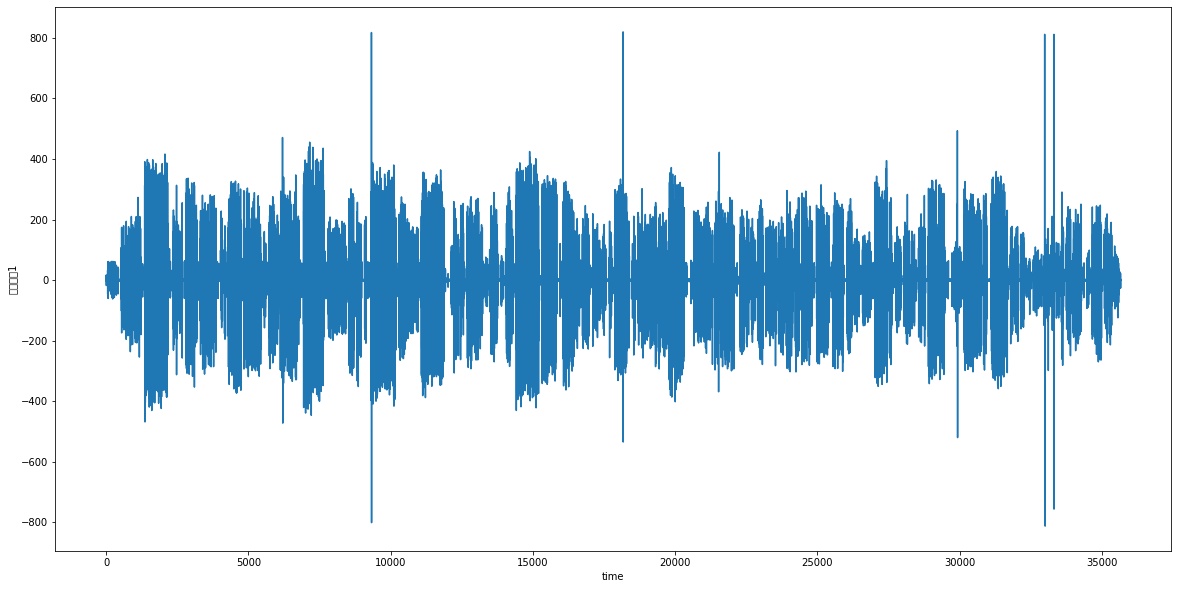

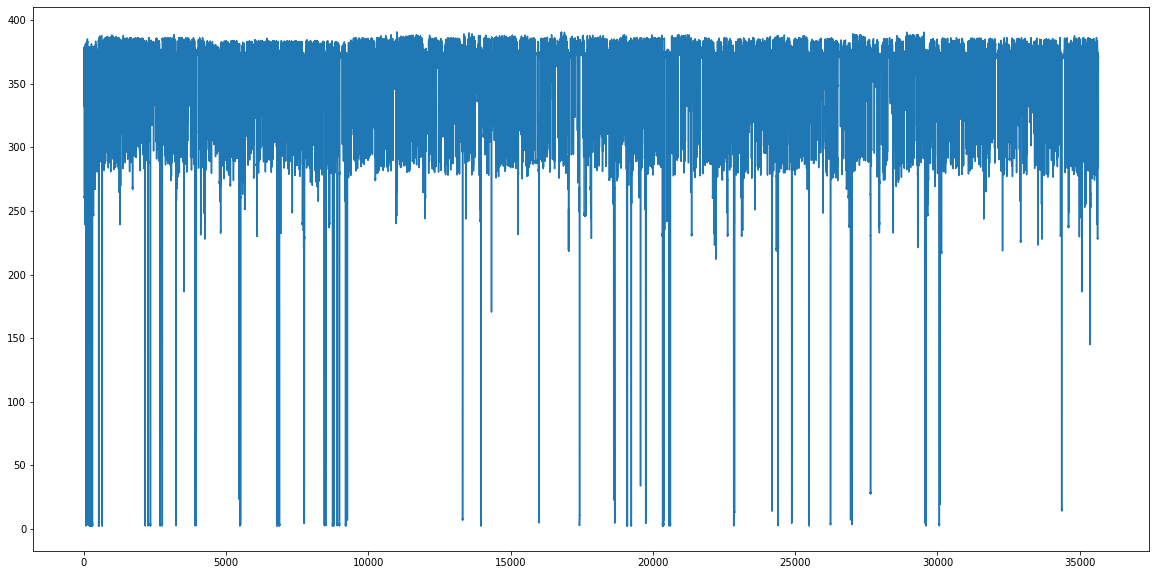

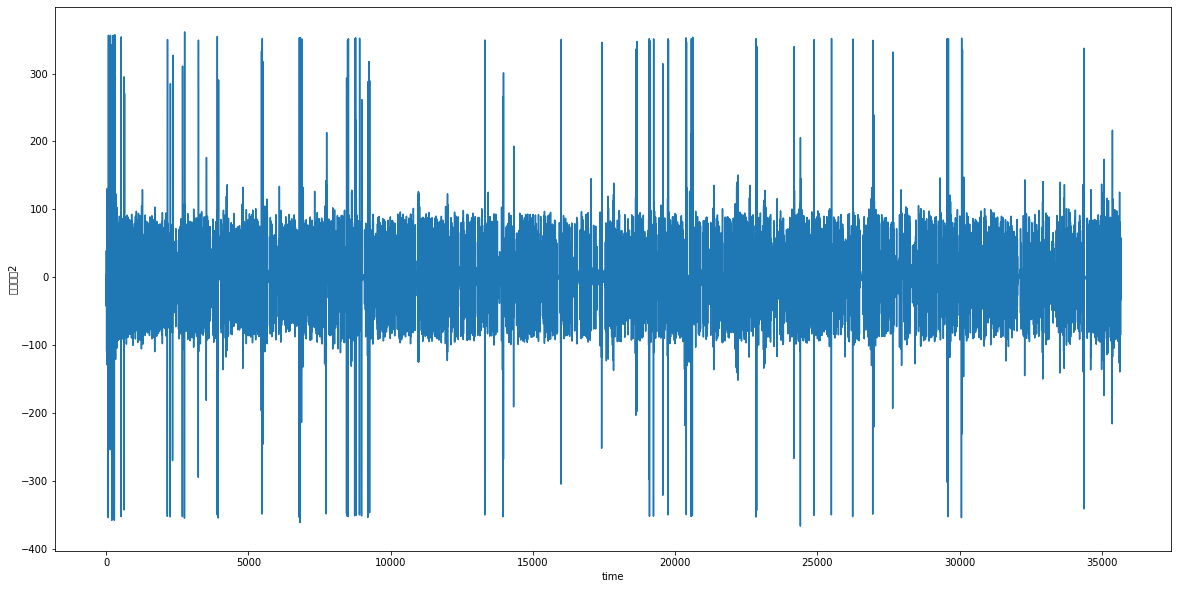

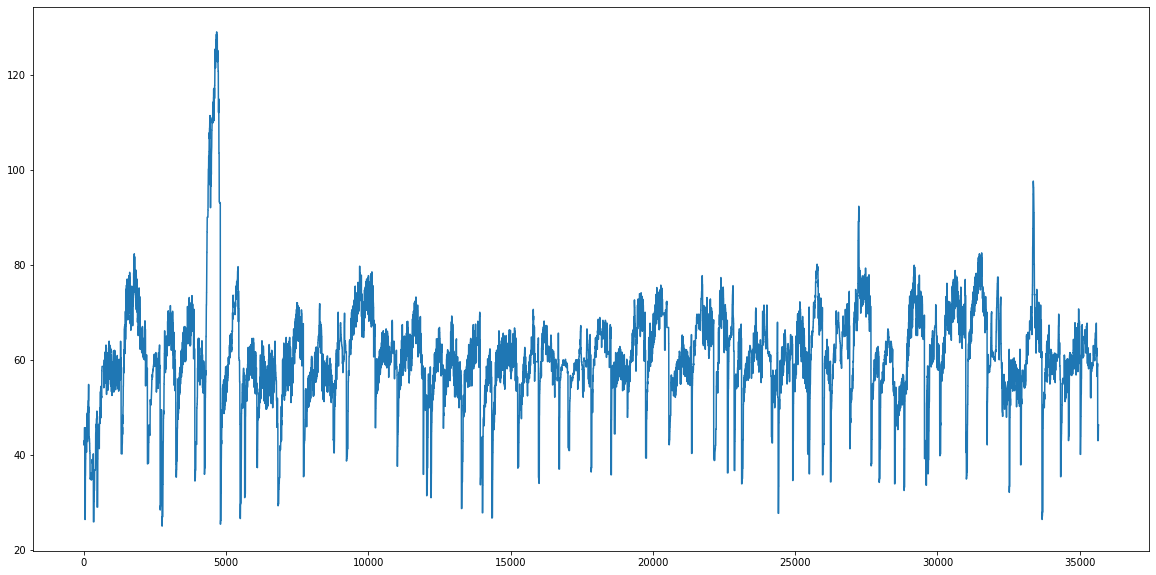

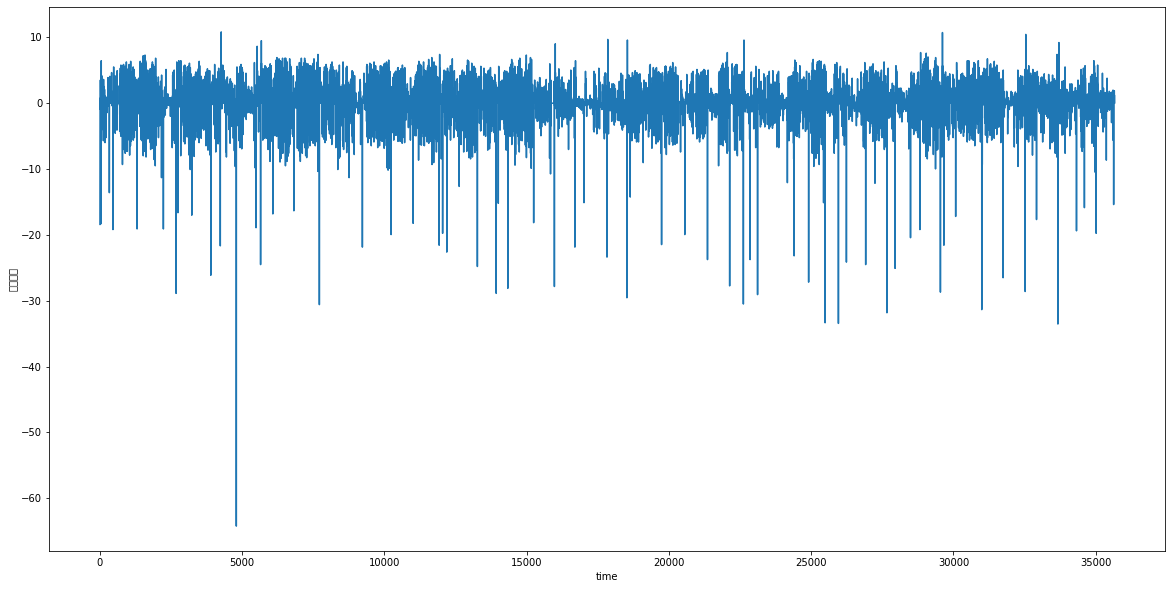

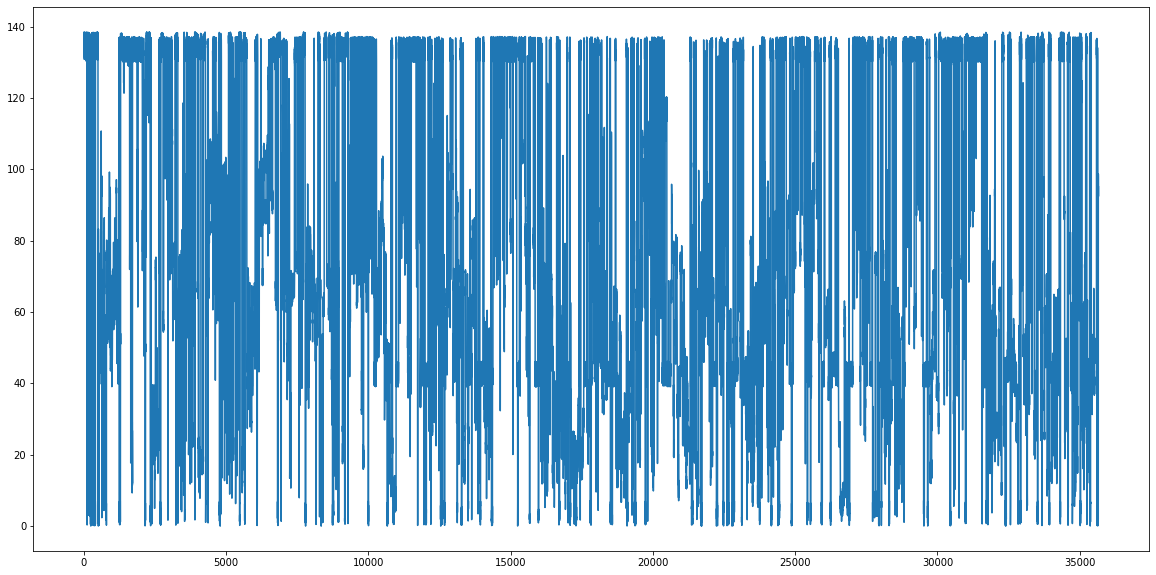

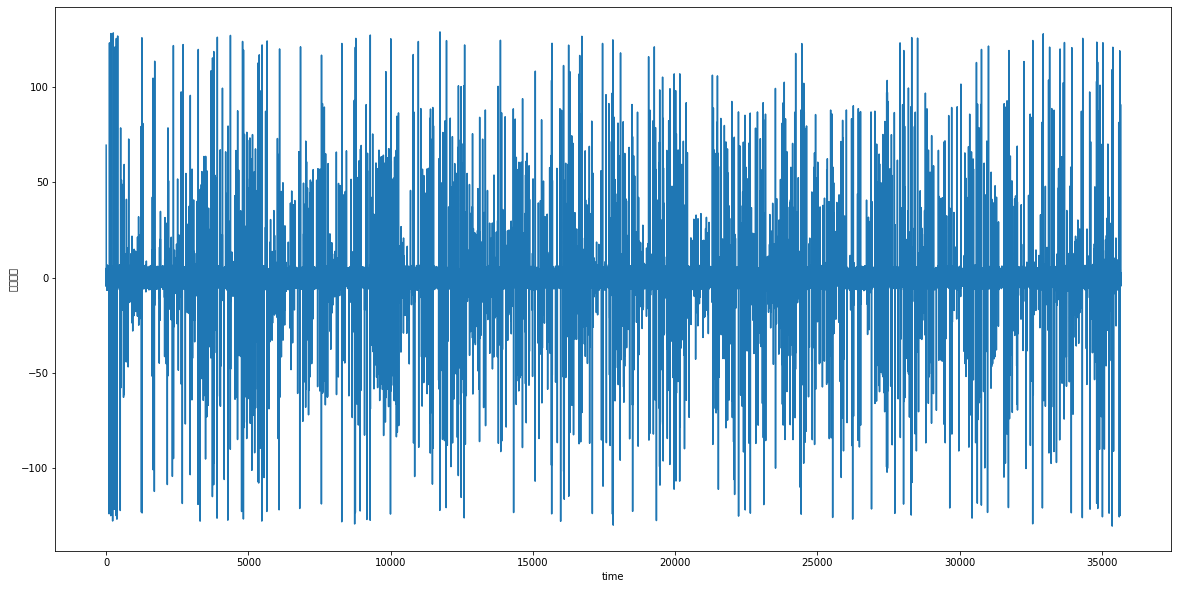

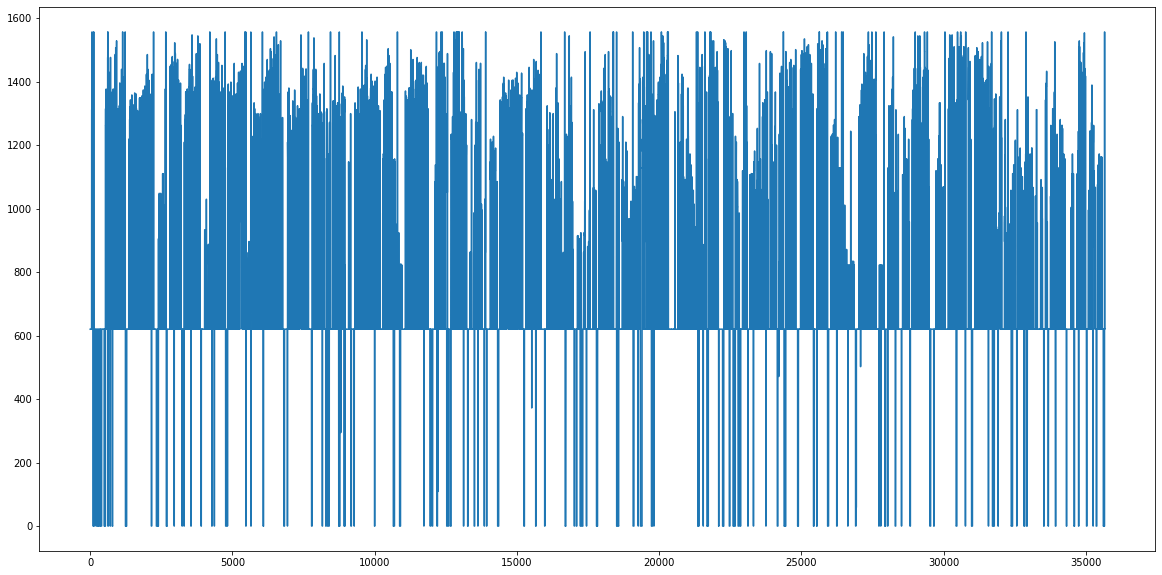

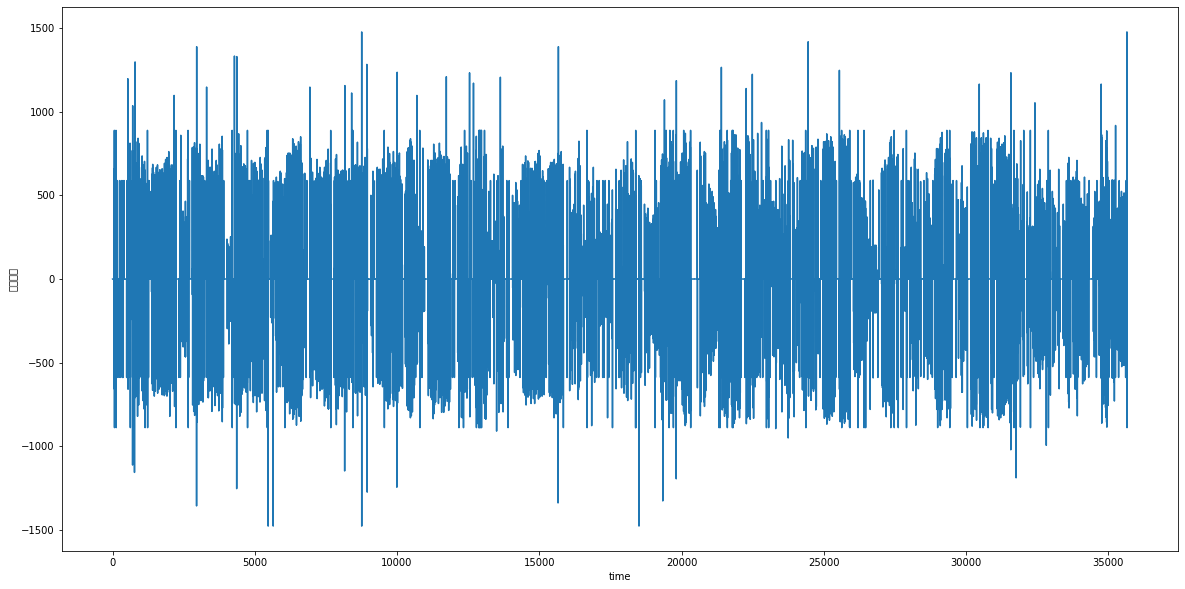

In [13]:
from scipy.signal import butter, sosfilt
import pywt
n_samples = data_length
def data_smooth(x, alpha=20, beta=1):
    new_x = np.zeros(x.shape[0])
    new_x[0] = x[0]
    for i in range(1, len(x)):
        tmp = x[i-1] * (alpha - beta) / alpha + x[i] * beta / alpha
        new_x[i] = x[i] - tmp
    return new_x

sample_duration = 0.02
sample_rate = n_samples * (1 / sample_duration)

def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

#高通
def high_pass_filter(x, low_cutoff=10000, sample_rate=sample_rate):
    nyquist = 0.5 * sample_rate
    norm_low_cutoff = low_cutoff / nyquist
    sos = butter(10, Wn=[norm_low_cutoff], btype='highpass', output='sos')
    filtered_sig = sosfilt(sos, x)
    return filtered_sig

#降噪
def denoise_signal(x, wavelet='haar', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])
    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

# 可视化转速的时序分布图
plt.figure(figsize=(20, 10))
for (df, e) in data:
    for i in [
              '转速信号1',
              '转速信号2',
              '压力信号1',
              '压力信号2',
              '温度信号',
              '流量信号',
              '电流信号',
            ]:
        plt.figure(figsize=(20, 10))
        plt.plot(df[i], label=i)
        x_hp = high_pass_filter(df[i], low_cutoff=10000, sample_rate=sample_rate) # 高通滤波  
        x_dn = denoise_signal(x_hp, wavelet='haar', level=1) # 降噪
        df_dn = df[i] - df[i].median()
        plt.figure(figsize=(20, 10))
        plt.plot(data_smooth(df_dn), label=i)
        plt.xlabel('time')
        plt.ylabel(i)
    plt.show()
    break


In [11]:
# 添加特征life表示部件最大工作时长
for i in range(data_length):
    data[i][0]['life'] = data[i][0]['部件工作时长'].max()

In [12]:
data_length

916

In [13]:
train_set=data[0:800]
test_set=data[800:]
print('train set length:',len(train_set))
print('test set length:',len(test_set))

train set length: 800
test set length: 116


将训练集按照寿命的0.45、0.55、0.63、0.75，0.85的比例进行构造：

In [14]:
ratio_list=[0.45,0.55,0.63,0.75,0.85]

In [15]:
name_list = data[0][0].columns.values.tolist() 
name_list

['部件工作时长',
 '累积量参数1',
 '累积量参数2',
 '转速信号1',
 '转速信号2',
 '压力信号1',
 '压力信号2',
 '温度信号',
 '流量信号',
 '电流信号',
 '开关1信号',
 '开关2信号',
 '告警信号1',
 '设备类型',
 'life']

# 三、特征工程

In [16]:
def ptp(x): # 极差
    return x.max()-x.min()

def margin(x): 
    data=np.sqrt(abs(x))
    df_margin=(ptp(x)) / (pow(data.mean(),2)+1e-10)
    return df_margin

def rms(x):
    data=np.sqrt(np.power(x.mean(),2)+np.power(x.std(),2))
    return data

def boxing(x):
    data = rms(x) / (np.abs(x.mean())+1e-10)
    return data

def peak(x):
    data = ptp(x) / (rms(x)+1e-10)

def pulse(x):
    data = ptp(x) / (np.abs(x.mean())+1e-10)
    return data

def soreoccurring(x):
    unique, counts = np.unique(x, return_counts=True)
    counts[counts < 2] = 0
    counts[counts > 1] = 1
    return np.sum(counts * unique)

def pereoccurring_all(x):
    if not isinstance(x, pd.Series):
        x = pd.Series(x)
    if x.size == 0:
        return np.nan
    value_counts = x.value_counts()
    reoccuring_values = value_counts[value_counts > 1].sum()
    if np.isnan(reoccuring_values):
        return 0
    return reoccuring_values / x.size

def datapoint(x):
    if len(x) == 0:
        return np.nan
    unique, counts = np.unique(x, return_counts=True)
    if counts.shape[0] == 0:
        return 0
    return np.sum(counts > 1) / float(counts.shape[0])

# 频域特征：信号傅里叶变换之后的均值，方差
def fft_mean(x):
    return np.mean(np.abs(np.fft.fft(x)))

def fft_std(x):
    return np.std(np.abs(np.fft.fft(x)))


# 用于训练的特征
def stat(data,c,name):
    c[name + '_max'] = data.max() # 最大值
    c[name + '_min'] = data.min() # 最小值
    c[name + '_ptp'] =  ptp(data) # 极差
    c[name + '_count'] = data.count() # 非空值个数
    c[name + '_mean'] = data.mean() # 均值
    c[name + '_std'] = data.std() # 标准差
    c[name + '_skew'] = data.skew() # 偏度 数据的不对称程度
    c[name + '_kurt'] = data.kurt() # 峰度 数据分布顶的尖锐程度
    c[name + '_mode'] = data.mode()[0] # 众数
    c[name + '_median'] = data.median() # 中位数

    c[name + '_margin'] = margin(data) # 裕度 表示数据的离散程度
    c[name + '_rms'] = rms(data) # 均方根 均方根是一种对信号能量的度量，它是信号能量的平方根
    c[name + '_boxing'] = boxing(data) # 波形
    c[name + '_pulse'] = pulse(data) # 脉冲 峰值与均值的比值

    c[name + '_soreoccurring'] = soreoccurring(data) # 重复出现的最大值
    c[name + '_pereoccurring_all'] = pereoccurring_all(data) # 重复出现的比例
    c[name + '_datapoint'] = datapoint(data) # 重复出现的数据点比例

    c[name + '_fft_mean'] = fft_mean(data) # 傅里叶变换之后的均值
    c[name + '_fft_std'] = fft_std(data) # 傅里叶变换之后的方差
    return c

In [20]:
# !pip install sklearn
import sklearn
# 输出所有设备类型
device = []
for data_i, f in train_set:
    if data_i['设备类型'].values[0] not in device:
        device.append(data_i['设备类型'].values[0])
print(device)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(device)
device_le = le.transform(device)
# 建立设备类型与数字的映射
device_dict = dict(zip(device, device_le))
print(device_dict)

['S26a', 'S100', 'S51d', 'S508', 'Saa3']
{'S26a': 1, 'S100': 0, 'S51d': 3, 'S508': 2, 'Saa3': 4}


此外除了对整体样本进行统计，我们还分阶段进行了统计

In [21]:
from sklearn.decomposition import PCA   
def process_sample_single_ratio(data, idx, ratio):
    lifemax = data['部件工作时长'].max() # 最大工作时长
    temp_data = data[0:int(len(data)*ratio)] # 取前ratio比例的数据作样本

    c = {'train_file_name':idx,
         '开关1_sum':temp_data['开关1信号'].sum(),
         '开关2_sum':temp_data['开关2信号'].sum(),
         '开关_sum':temp_data['开关1信号'].sum()+temp_data['开关2信号'].sum(),
         '告警1_sum':temp_data['告警信号1'].sum(),
         '告警1比例':data['告警信号1'].sum()/(1e-8+data['开关1信号'].sum()+data['开关2信号'].sum()),
         '设备':device_dict[data['设备类型'].values[0]],
         'life':lifemax - temp_data['部件工作时长'].max(),
         }
    for i in name_list[0:10]:
        c=stat(temp_data[i],c,i)
    this_tv_features = pd.DataFrame(c, index=[idx])  

    return this_tv_features

In [71]:
# 处理训练集
train=process_sample_single_ratio(train_set[0][0], 0, ratio_list[0])
for i in range(len(ratio_list)):
    ratio=ratio_list[i] # 取前ratio比例的数据作样本
    for j in range(len(train_set) // len(ratio_list)):
        if not(i==0 and j==0):
            temp =  process_sample_single_ratio(train_set[i*160+j][0],j,ratio)
            train = pd.concat((train,temp))

assert len(train) == len(train_set), 'train length error'


,train_file_name,开关1_sum,开关2_sum,开关_sum,告警1_sum,告警1比例,设备,life,部件工作时长_max,部件工作时长_min,...,电流信号_kurt,电流信号_mode,电流信号_median,电流信号_margin,电流信号_rms,电流信号_boxing,电流信号_pulse,电流信号_soreoccurring,电流信号_pereoccurring_all,电流信号_datapoint
0,0,8569.0,0.0,8569.0,802.0,0.094582,1,4127.5,3815.00,0.0,...,-0.411350,620.16,620.22,2.136956,931.963040,1.115031,1.947553,2101835.11,0.958665,0.617029
1,1,286.0,0.0,286.0,6.0,0.006719,1,290.0,160.00,0.0,...,-0.880296,0.15,620.04,6.611892,653.187016,1.429526,3.630308,74896.51,0.866517,0.310145
2,2,451.0,0.0,451.0,67.0,0.114890,1,300.0,216.75,0.0,...,-0.266870,620.01,620.20,2.413475,794.570994,1.124273,2.061954,120768.26,0.841960,0.397368
3,3,1288.0,0.0,1288.0,205.0,0.081051,1,1102.5,616.25,0.0,...,3.467881,1007.76,1144.08,1.708197,1148.754659,1.056605,1.562804,1055961.60,0.885110,0.610851
4,4,2043.0,0.0,2043.0,24.0,0.010595,1,1165.0,1069.00,0.0,...,-0.164988,620.15,620.21,2.091639,860.047043,1.074948,1.999668,616604.44,0.904369,0.456948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,2307.0,0.0,2307.0,17.0,0.006093,1,250.0,1159.75,0.0,...,-0.675859,620.05,620.25,2.052978,934.175755,1.083982,1.914017,730717.79,0.894037,0.523256
156,156,399.0,0.0,399.0,144.0,0.291391,1,77.5,237.00,0.0,...,-0.372097,2015.08,1097.57,1.790123,1335.335916,1.092001,1.648057,427682.61,0.724802,0.411205
157,157,4059.0,0.0,4059.0,62.0,0.023759,1,300.0,1992.50,0.0,...,4.203793,1627.51,1451.09,1.306740,1381.970058,1.042936,1.228457,2511182.53,0.925166,0.644482
158,158,445.0,0.0,445.0,132.0,0.232804,3,47.5,233.00,0.0,...,0.816191,620.03,620.16,3.185423,735.968796,1.154404,2.650520,155964.56,0.913630,0.397647


在对训练数据集和测试数据集进行基本统计分析时，我们重点关注标准差，最小值和最大值三个指标，标准差反映了数据的离散程度，最大和最小值一般可以看出数据是否有异常值。

In [23]:
# 因为describe输出的内容过大，我们将describe输出的内容保存在csv文件中进行观察
with open('train_describe.csv', 'w') as f:
    f.write(train.describe().to_csv())

In [24]:
train

,train_file_name,开关1_sum,开关2_sum,开关_sum,告警1_sum,告警1比例,设备,life,部件工作时长_max,部件工作时长_min,...,电流信号_kurt,电流信号_mode,电流信号_median,电流信号_margin,电流信号_rms,电流信号_boxing,电流信号_pulse,电流信号_soreoccurring,电流信号_pereoccurring_all,电流信号_datapoint
0,0,8569.0,0.0,8569.0,802.0,0.094582,1,4127.5,3815.00,0.0,...,-0.411350,620.16,620.22,2.136956,931.963040,1.115031,1.947553,2101835.11,0.958665,0.617029
1,1,286.0,0.0,286.0,6.0,0.006719,1,290.0,160.00,0.0,...,-0.880296,0.15,620.04,6.611892,653.187016,1.429526,3.630308,74896.51,0.866517,0.310145
2,2,451.0,0.0,451.0,67.0,0.114890,1,300.0,216.75,0.0,...,-0.266870,620.01,620.20,2.413475,794.570994,1.124273,2.061954,120768.26,0.841960,0.397368
3,3,1288.0,0.0,1288.0,205.0,0.081051,1,1102.5,616.25,0.0,...,3.467881,1007.76,1144.08,1.708197,1148.754659,1.056605,1.562804,1055961.60,0.885110,0.610851
4,4,2043.0,0.0,2043.0,24.0,0.010595,1,1165.0,1069.00,0.0,...,-0.164988,620.15,620.21,2.091639,860.047043,1.074948,1.999668,616604.44,0.904369,0.456948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,2307.0,0.0,2307.0,17.0,0.006093,1,250.0,1159.75,0.0,...,-0.675859,620.05,620.25,2.052978,934.175755,1.083982,1.914017,730717.79,0.894037,0.523256
156,156,399.0,0.0,399.0,144.0,0.291391,1,77.5,237.00,0.0,...,-0.372097,2015.08,1097.57,1.790123,1335.335916,1.092001,1.648057,427682.61,0.724802,0.411205
157,157,4059.0,0.0,4059.0,62.0,0.023759,1,300.0,1992.50,0.0,...,4.203793,1627.51,1451.09,1.306740,1381.970058,1.042936,1.228457,2511182.53,0.925166,0.644482
158,158,445.0,0.0,445.0,132.0,0.232804,3,47.5,233.00,0.0,...,0.816191,620.03,620.16,3.185423,735.968796,1.154404,2.650520,155964.56,0.913630,0.397647


In [25]:
feature_counts = train.shape[1]
print('feature_counts:', feature_counts)
# 分析不同特征与life的相关性，挑选出相关性较大的特征
corr = train.corr()
corr.to_csv('corr.csv')
corr['life'].sort_values(ascending=False)

feature_counts: 178


life            1.000000
部件工作时长_kurt     0.938759
压力信号2_boxing    0.631450
转速信号1_boxing    0.463720
压力信号2_margin    0.320942
                  ...   
转速信号1_mode     -0.380498
部件工作时长_skew    -0.619680
部件工作时长_min           NaN
累积量参数1_min           NaN
累积量参数2_min           NaN
Name: life, Length: 178, dtype: float64

In [26]:
# 删除相关性为nan的特征
del train['部件工作时长_min']
del train['累积量参数1_min']
del train['累积量参数2_min']

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

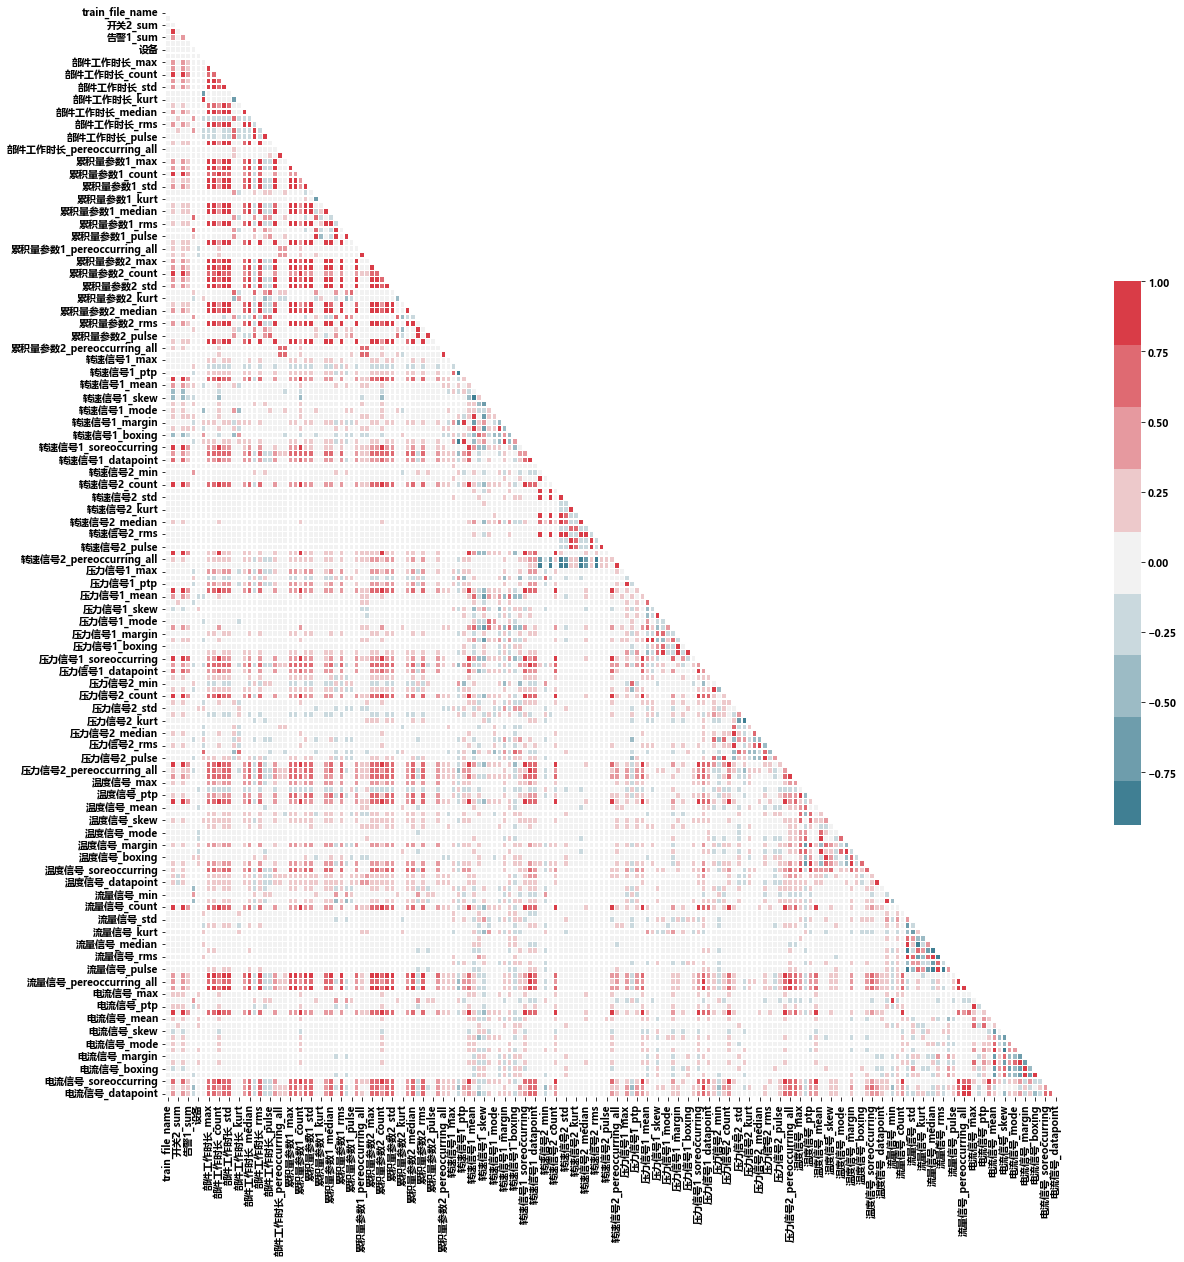

In [40]:
import seaborn as sns
import matplotlib
matplotlib.rc("font",family="MicroSoft YaHei",weight="bold")
#绘制相关性热力图
corr_draw = train.corr() 
cmap = sns.choose_diverging_palette()
f, ax = plt.subplots(figsize=(20,20))   #设置画布大小
mask = np.zeros_like(corr_draw, dtype=np.bool)   #定义一个大小一致全为零的矩阵  用布尔类型覆盖原来的类型
mask[np.triu_indices_from(mask)]= True      #返回矩阵的上三角，并将其设置为true
sns.heatmap(corr_draw
            ,mask=mask       #只显示为true的值
            , cmap=cmap
#             , vmax=.3
            , center=0
#             ,square=True
            , linewidths=.5
            , cbar_kws={"shrink": .5}
            , annot=False     #底图带数字 True为显示数字
           )
# heatmap = f.get_figure()
plt.savefig("D:/Data_Ana/HM/figs/corr_heatmap1.png", transparent=True,dpi = 1200)

In [41]:
# 挑选相关性绝对值最小的十个特征
corr = train.corr()
corr_abs = corr['life'].abs().sort_values(ascending=False)[100:]
print(corr_abs)
# 删除corr_abs中的特征
for i in corr_abs.index:
    del train[i]
print(train.shape)

转速信号2_skew     0.022839
电流信号_rms       0.022824
压力信号1_min      0.021590
累积量参数1_rms     0.019791
累积量参数1_mean    0.019736
                 ...   
开关2_sum        0.001428
告警1_sum        0.001361
流量信号_min       0.000464
转速信号1_ptp      0.000117
转速信号2_pulse    0.000087
Name: life, Length: 75, dtype: float64
(800, 100)


interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

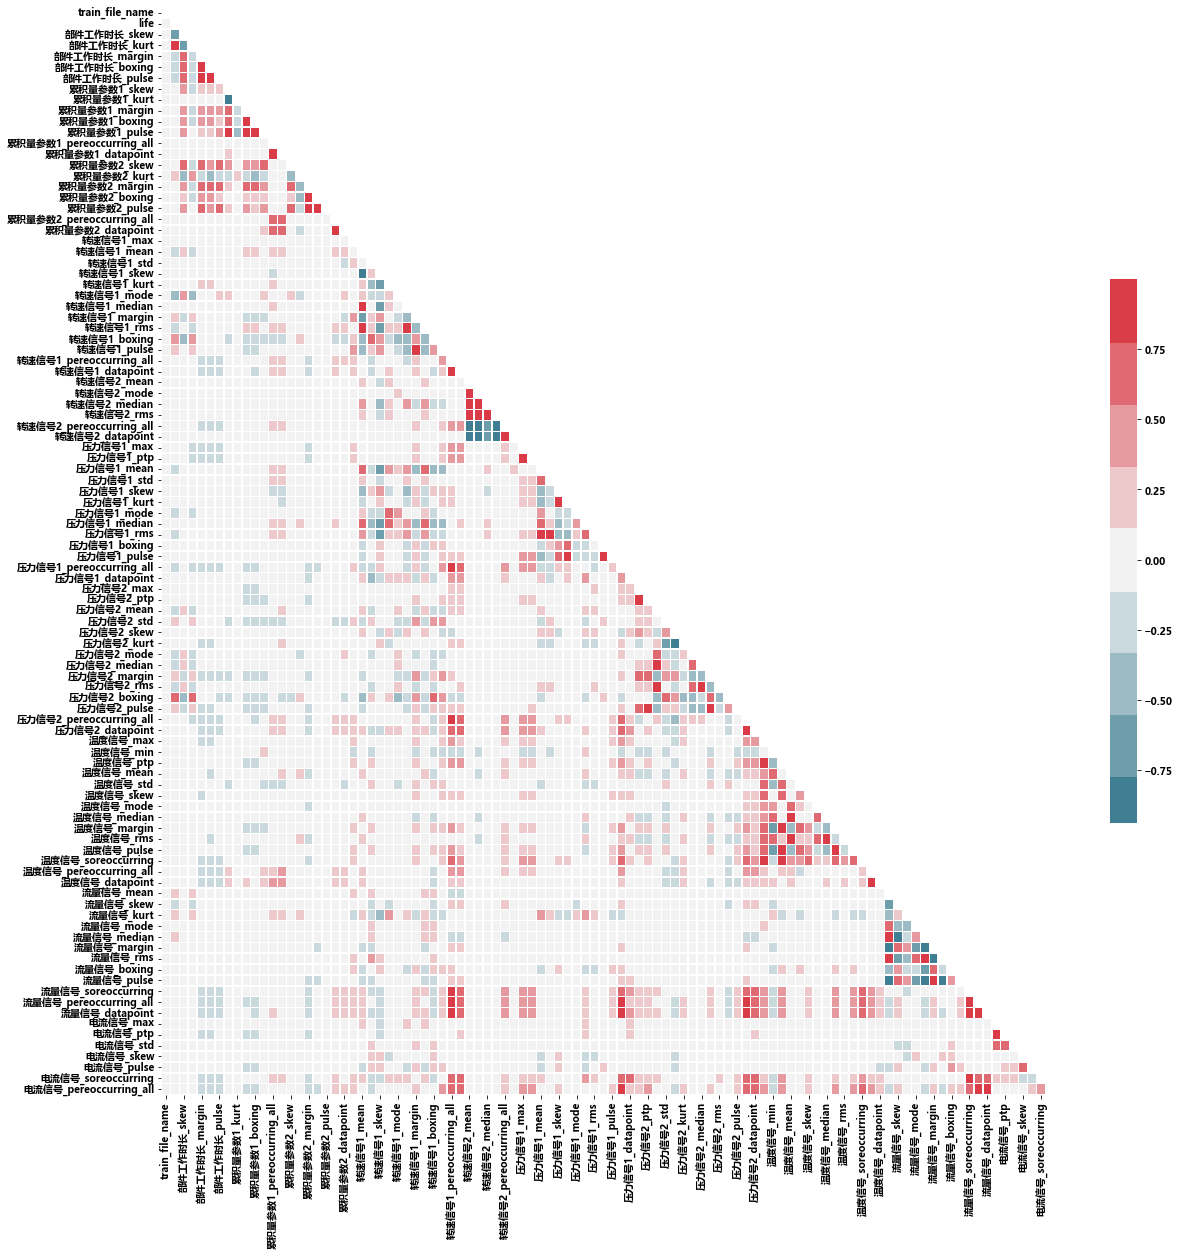

In [42]:
import seaborn as sns
import matplotlib
matplotlib.rc("font",family="MicroSoft YaHei",weight="bold")
#绘制挑选之后的相关性热力图
corr_draw = train.corr() 
cmap = sns.choose_diverging_palette()
f, ax = plt.subplots(figsize=(20,20))   #设置画布大小
mask = np.zeros_like(corr_draw, dtype=np.bool)   #定义一个大小一致全为零的矩阵  用布尔类型覆盖原来的类型
mask[np.triu_indices_from(mask)]= True      #返回矩阵的上三角，并将其设置为true
sns.heatmap(corr_draw
            ,mask=mask       #只显示为true的值
            , cmap=cmap
#             , vmax=.3
            , center=0
#             ,square=True
            , linewidths=.5
            , cbar_kws={"shrink": .5}
            , annot=False     #底图带数字 True为显示数字
           )
# heatmap = f.get_figure()
plt.savefig("D:/Data_Ana/HM/figs/corr_heatmap2.png", transparent=True,dpi = 1200)

In [43]:
Y = train['life']
X = train.drop(['life'], axis=1)
print(X.shape, Y.shape)

(800, 99) (800,)


In [45]:
import random
import string
ratio = random.randint(2,98)/100
test = process_sample_single_ratio(test_set[0][0],0,ratio)

for j in range(1, len(test_set)):
    ratio = random.randint(2,98)/100
    temp =  process_sample_single_ratio(test_set[j][0],j,ratio)# #     print(temp)
    test = pd.concat((test,temp))

In [46]:
del test['部件工作时长_min']
del test['累积量参数1_min']
del test['累积量参数2_min']

# 删除corr_abs中的特征
for i in corr_abs.index:
    del test[i]

In [101]:
#保存一下训练和测试数据，方便后续操作
train.to_csv("D:/Data_Ana/HM/data/train.csv")
test.to_csv("D:/Data_Ana/HM/data/test.csv")
train['life'].to_csv("D:/Data_Ana/HM/data/train_label.csv")

从这里开始测试各类特征工程

In [77]:
import pandas as pd
train = pd.read_csv("D:/Data_Ana/HM/data/train.csv")
test = pd.read_csv("D:/Data_Ana/HM/data/test.csv")
del train['Unnamed: 0']
del test['Unnamed: 0']

Text(0.5, 1.0, 'Life bins')

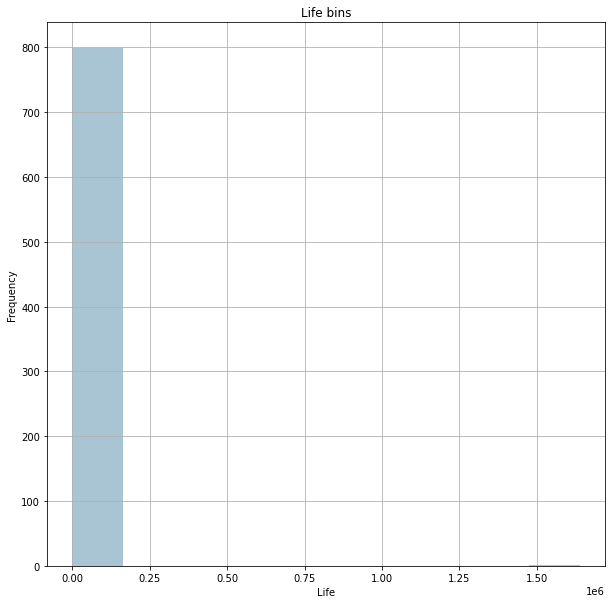

In [78]:
#分段映射life,先绘制直方图
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# 第一步
fcc_survey_df = train
 
# 对年龄特征进行分段标记：比如0-9分为0, 10-19为1....
# 先对年龄字典画直方图，直方图本身也是一种分段过程
# 第二步
f, ax = plt.subplots(figsize=(10,10))
fcc_survey_df['life'].hist(color='#A9C5D3')
ax.set_xlabel('Life')
ax.set_ylabel('Frequency')
ax.set_title('Life bins')
# plt.show()
# plt.savefig("D:/Data_Ana/HM/figs/life_before.png", transparent=True,dpi = 600)

Text(0.5, 1.0, 'Life bins')

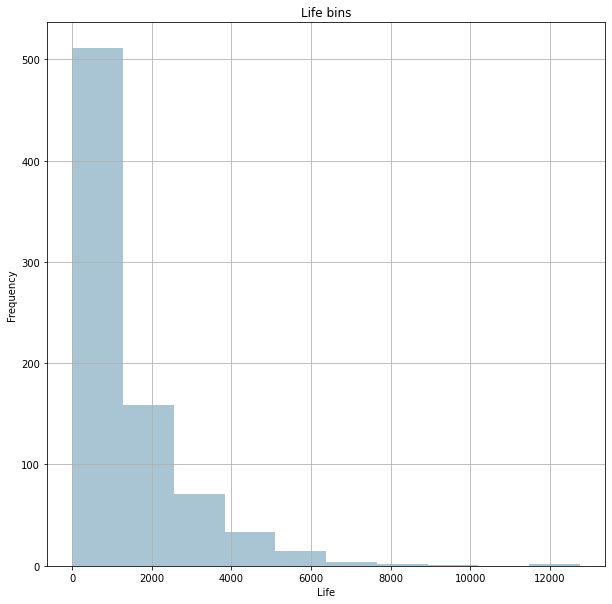

In [80]:
#发现有异常值，处理后重新绘图
index = train[train.life == train['life'].max()].index.tolist()[0]  
train = train.drop(index)
index = train[train.life == 0.].index.tolist()[0]
train = train.drop(index)
# 第一步
fcc_survey_df = train
 
# 对年龄特征进行分段标记：比如0-9分为0, 10-19为1....
# 先对年龄字典画直方图，直方图本身也是一种分段过程
# 第二步
f, ax = plt.subplots(figsize=(10,10))
fcc_survey_df['life'].hist(color='#A9C5D3')
ax.set_xlabel('Life')
ax.set_ylabel('Frequency')
ax.set_title('Life bins')
# plt.show()
# plt.savefig("D:/Data_Ana/HM/figs/life_after.png",dpi = 600)

In [64]:
# 对剩下的特征进行pca降维
label=train['life']
TF_name_pca = train['train_file_name']
train_pca = train.copy()
del train_pca['life']
del train_pca['train_file_name']
feature_counts = train_pca.shape[1]
from sklearn.decomposition import PCA   
pca = PCA(n_components=int(feature_counts * 0.8)) # 保留80%的信息
pca.fit(train_pca)
train_pca = pca.transform(train_pca)
train_pca = pd.DataFrame(train_pca)
train_pca['life']=label
train_pca['train_file_name'] = TF_name_pca
train=train_pca

In [65]:
#用该映射矩阵处理test
label=test['life']
TF_name_pca = test['train_file_name']
test_pca = test.copy()
del test_pca['life']
del test_pca['train_file_name']
feature_counts = test_pca.shape[1]

test_pca = pca.transform(test_pca)
test_pca = pd.DataFrame(test_pca)
test_pca['life']=label
test_pca['train_file_name'] = TF_name_pca
test =test_pca

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

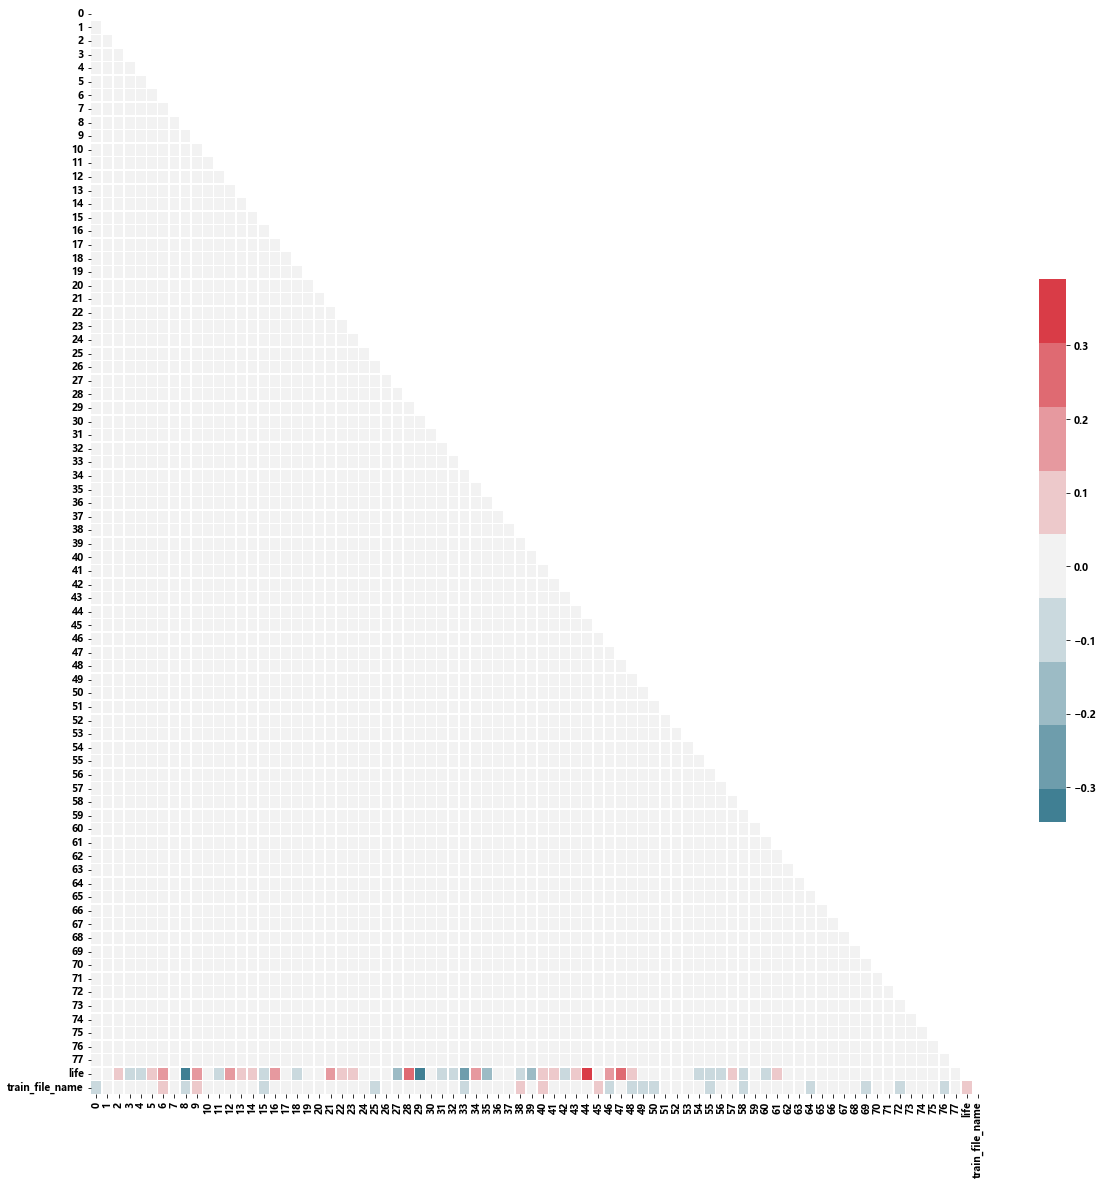

In [79]:
import seaborn as sns
import matplotlib
matplotlib.rc("font",family="MicroSoft YaHei",weight="bold")
#绘制PCA之后的相关性热力图
corr_draw = train.corr() 
cmap = sns.choose_diverging_palette()
f, ax = plt.subplots(figsize=(20,20))   #设置画布大小
mask = np.zeros_like(corr_draw, dtype=np.bool)   #定义一个大小一致全为零的矩阵  用布尔类型覆盖原来的类型
mask[np.triu_indices_from(mask)]= True      #返回矩阵的上三角，并将其设置为true
sns.heatmap(corr_draw
            ,mask=mask       #只显示为true的值
            , cmap=cmap
#             , vmax=.3
            , center=0
#             ,square=True
            , linewidths=.5
            , cbar_kws={"shrink": .5}
            , annot=False     #底图带数字 True为显示数字
           )
# heatmap = f.get_figure()
plt.savefig("D:/Data_Ana/HM/figs/corr_heatmap_PCA.png", transparent=True,dpi = 1200)

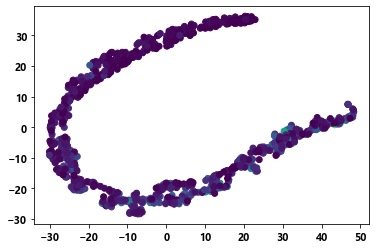

In [189]:
# train_tsne=train.copy()
# # 使用/10取整对年龄字段进行分段处理
# life_bins = np.floor(train_tsne['life'].values / 200)
# # print(life_bins)
# # 第四步：将列表放入原数据中进行展示
# train_tsne['life_bins'] = life_bins
# del train_tsne['life']
# del train_tsne['train_file_name']
# #通过Tsne可视化，观察特征提取效果
# from sklearn.manifold import TSNE

# data_tsne = train_tsne.iloc[:,0:78]
# label_tsne =train_tsne['life_bins'].tolist()
# # print(label_tsne)
# # color_tsne = []
# # for i in label_tsne:
# #     if i not in color_tsne:
# #         color_tsne.append(i)
# # print(color_tsne)
# # cmap = plt.cm.get_cmap(len(color_tsne))
# # print(cmap)
# X_tsne = TSNE(n_components=2).fit_transform(data_tsne)
# X_tsne
# # plt.figure(figsize=(10, 5))
# # plt.subplot(121)
# # colors = ['black','tomato','yellow','cyan','blue', 'lime', 'r', 'violet','m','peru','olivedrab','hotpink']#设置散点颜色
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=label_tsne,label="t-SNE")
# # train_tsne['life']

In [84]:
train.iloc[291]

train_file_name              132.000000
life                         955.000000
部件工作时长_skew                   -0.097149
部件工作时长_kurt                   -1.297279
部件工作时长_margin                  2.433931
                              ...      
电流信号_std                     397.010773
电流信号_skew                      0.174632
电流信号_pulse                     1.983321
电流信号_soreoccurring        878727.120000
电流信号_pereoccurring_all         0.840029
Name: 292, Length: 100, dtype: float64

In [67]:
# assert len(test) == len(test_set), 'test length error'
assert len(test.columns) == len(train.columns), 'test columns error'

##开始训练

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

In [105]:
train_use = train.copy()
train_Y = train_use['life']
del train_use['life']
del train_use['train_file_name']
train_X = train_use
test_use = test.copy()
test_Y = test_use['life']
del test_use['life']
del test_use['train_file_name']
test_X = test_use

In [106]:
train_X.to_csv("D:/Data_Ana/HM/data/train_X.csv")
train_Y.to_csv("D:/Data_Ana/HM/data/train_Y.csv")
test_X.to_csv("D:/Data_Ana/HM/data/test_X.csv")
test_Y.to_csv("D:/Data_Ana/HM/data/test_Y.csv")

In [72]:
# # 划分训练集和测试集
# train_X = X[:len(train) * 4 // 5]
# train_Y = Y[:len(train) * 4 // 5]
# test_X = X[len(train) * 4 // 5:]
# test_Y = Y[len(train) * 4 // 5:]

In [107]:
def split_data(data):
    """
    split data into train and test
    Output:
        x_train: the features of train data
        y_train: the labels of train data
        x_test: the features of test data
        y_test: the labels of test data
    """
    y = data['life'] # get the label
    x = data.loc[:, data.columns != 'life'] # get the feature
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # split the data
    assert x_train.shape[0] + x_test.shape[0] == data.shape[0] # check the data
    return x_train, x_test, y_train, y_test

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

def predict(x_train, x_test, y_train):
    # knn
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)

    # svm
    svm = SVC()
    svm.fit(x_train, y_train)
    svm_pred = svm.predict(x_test)

    # logistic regression
    log_lm = LogisticRegression()
    log_lm.fit(x_train, y_train)
    logy_pred = log_lm.predict(x_test)
    
    # mlp 
    mlp = MLPClassifier()
    mlp.fit(x_train, y_train)
    mlp_pred = mlp.predict(x_test)

    # random forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    rfy_pred = rf.predict(x_test)

    # adaboost 
    ada = AdaBoostClassifier(random_state=42)
    ada.fit(x_train, y_train)
    aday_pred = ada.predict(x_test)

    # gradient boosting
    gbrt = GradientBoostingClassifier(random_state=42)
    gbrt.fit(x_train, y_train)
    gbrt_pred=gbrt.predict(x_test)

    # bagging
    bag = BaggingClassifier(random_state=42)
    bag.fit(x_train, y_train)
    bag_pred = bag.predict(x_test)

    predict = {'knn': knn_pred, 'svm': svm_pred, 'logistic': logy_pred, 'mlp': mlp_pred, 'random forest': rfy_pred, 'adaboost': aday_pred, 'gradient boosting': gbrt_pred, 'bagging': bag_pred}
    
    return predict

In [69]:
def get_score(predict, target):
    N=len(predict)
    sum=0
    for i in range(N):
        sum+=(np.log10(target.values[i]+1)-np.log10(predict[i]+1))**2
    score=np.sqrt(sum/N)
    return score

In [115]:
regressor = tree.DecisionTreeRegressor(criterion='squared_error',
                                       random_state=0,
                                       min_samples_leaf=2,
                                       min_samples_split=10)
predict_test=pd.DataFrame({'life': np.zeros(len(test_X))})
for fold_id, (trn_idx, val_idx) in enumerate(kf.split(train_X)):
    print(f'\nFold_{fold_id} Training ================================\n')
    data_train=train_X.iloc[trn_idx]
    target_train=train_Y.iloc[trn_idx]
    data_valid=train_X.iloc[val_idx]
    target_valid=train_Y.iloc[val_idx]
    regressor = regressor.fit(data_train, target_train)
    predict_train = regressor.predict(data_train)
    predict_valid = regressor.predict(data_valid)
    predict_test['life'] += regressor.predict(test_X)/5

    score_train=get_score(predict_train, target_train)
    score_valid=get_score(predict_valid, target_valid)
    print('score_train:', score_train, 'score_valid:', score_valid)
score_test=get_score(predict_test['life'],test_Y)
print('score_test:', score_test)


Fold_0 Training ================================

score_train: 0.1408227564771979 score_valid: 0.5376026451914869

Fold_1 Training ================================

score_train: 0.14325715751281562 score_valid: 0.42483804181944906

Fold_2 Training ================================

score_train: 0.15639542423515335 score_valid: 0.38009285955725813

Fold_3 Training ================================

score_train: 0.1562663997338699 score_valid: 0.40125556824791775

Fold_4 Training ================================

score_train: 0.10803882689982501 score_valid: 0.683463748480067
score_test: 0.5280370353503973
